In [1]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import pandas as pd



In [2]:
#load data
Fraud=pd.read_csv('Fraud_check.csv')
Fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
Fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
Fraud.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [5]:
Fraud.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [6]:
Fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
Fraud.shape

(600, 6)

In [8]:
Fraud.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [9]:
Fraud.isnull()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
595,False,False,False,False,False,False
596,False,False,False,False,False,False
597,False,False,False,False,False,False
598,False,False,False,False,False,False


#EDA(data visualization)

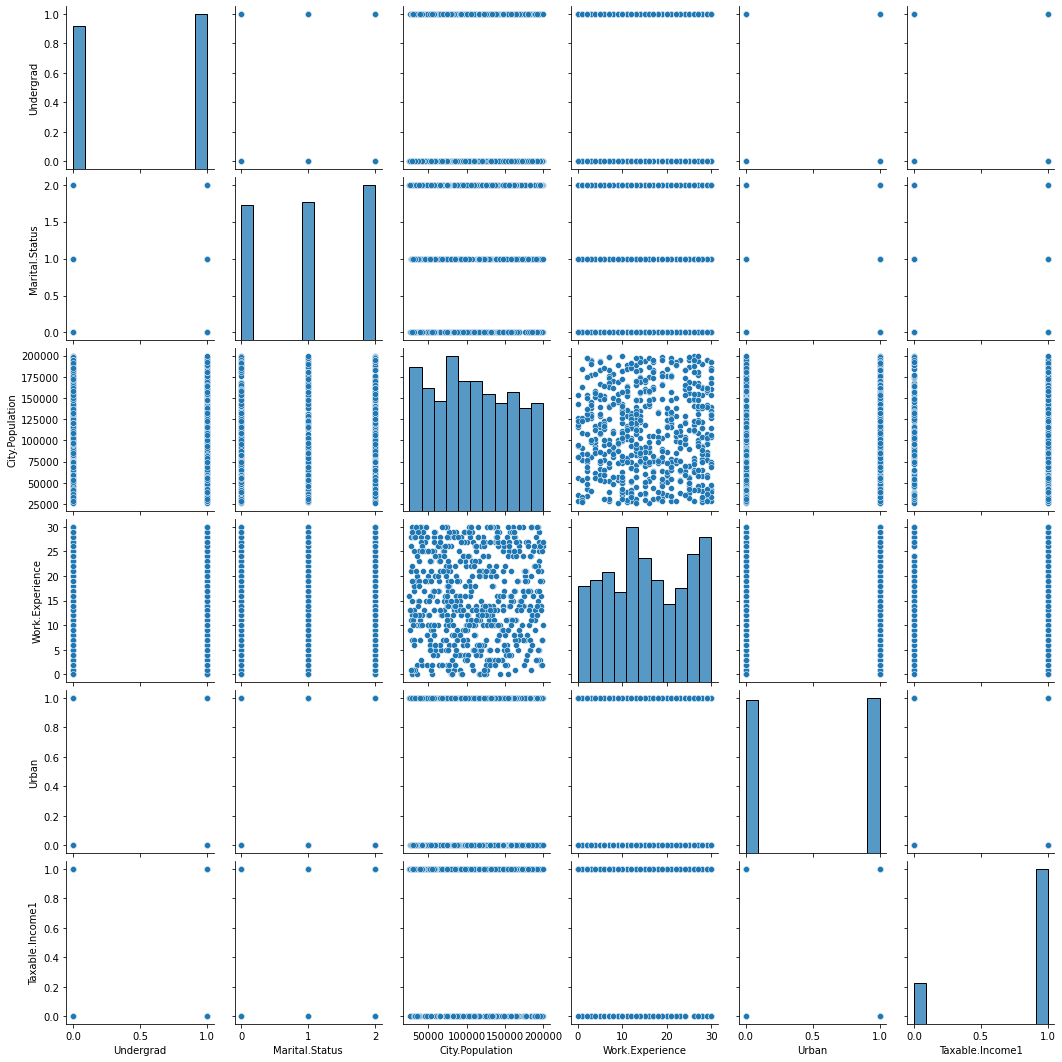

In [25]:
sns.pairplot(Fraud)

<AxesSubplot:>

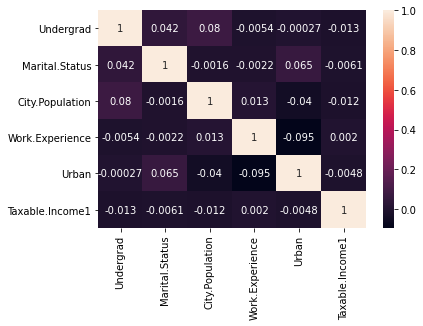

In [26]:
sns.heatmap(Fraud.corr(), annot = True)

#preprocessig:

In [10]:
Fraud.loc[Fraud["Taxable.Income"] <=30000,"Taxable.Income1"]="Good"
Fraud.loc[Fraud["Taxable.Income"] >=30000,"Taxable.Income1"]="Risky"

In [11]:
Fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable.Income1
0,NO,Single,68833,50047,10,YES,Risky
1,YES,Divorced,33700,134075,18,YES,Risky
2,NO,Married,36925,160205,30,YES,Risky
3,YES,Single,50190,193264,15,YES,Risky
4,NO,Married,81002,27533,28,NO,Risky
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Risky
596,YES,Divorced,69967,55369,2,YES,Risky
597,NO,Divorced,47334,154058,0,YES,Risky
598,YES,Married,98592,180083,17,NO,Risky


In [12]:
Fraud.drop(['Taxable.Income'],axis=1,inplace=True)

In [13]:
Fraud

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income1
0,NO,Single,50047,10,YES,Risky
1,YES,Divorced,134075,18,YES,Risky
2,NO,Married,160205,30,YES,Risky
3,YES,Single,193264,15,YES,Risky
4,NO,Married,27533,28,NO,Risky
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Risky
596,YES,Divorced,55369,2,YES,Risky
597,NO,Divorced,154058,0,YES,Risky
598,YES,Married,180083,17,NO,Risky


In [14]:
#Label Encoder:
label_encoder=preprocessing.LabelEncoder()
Fraud["Undergrad"]=label_encoder.fit_transform(Fraud["Undergrad"])
Fraud["Urban"]=label_encoder.fit_transform(Fraud["Urban"])
Fraud["Taxable.Income1"]=label_encoder.fit_transform(Fraud["Taxable.Income1"])
Fraud["Marital.Status"]=label_encoder.fit_transform(Fraud["Marital.Status"])

In [15]:
Fraud

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income1
0,0,2,50047,10,1,1
1,1,0,134075,18,1,1
2,0,1,160205,30,1,1
3,1,2,193264,15,1,1
4,0,1,27533,28,0,1
...,...,...,...,...,...,...
595,1,0,39492,7,1,1
596,1,0,55369,2,1,1
597,0,0,154058,0,1,1
598,1,1,180083,17,0,1


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

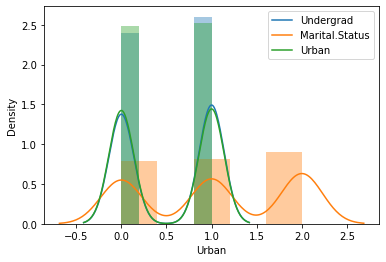

In [17]:

sns.distplot(Fraud['Undergrad'])
sns.distplot(Fraud['Marital.Status'])
sns.distplot(Fraud['Urban'])

plt.legend(['Undergrad','Marital.Status','Urban'])

<AxesSubplot:>

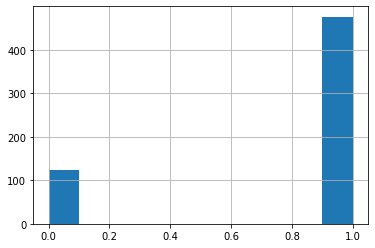

In [18]:
Fraud['Taxable.Income1'].hist()

In [19]:
X=Fraud.iloc[:,0:5]
Y=Fraud["Taxable.Income1"]

In [20]:
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [21]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Taxable.Income1, Length: 600, dtype: int32

In [22]:
kfold=KFold(n_splits=10,random_state=7)
num_trees=50
model=RandomForestClassifier(n_estimators=num_trees,max_features=3)
result=cross_val_score(model,X,Y,cv=kfold)

In [23]:
result

array([0.78333333, 0.71666667, 0.65      , 0.71666667, 0.73333333,
       0.63333333, 0.81666667, 0.71666667, 0.73333333, 0.81666667])

In [24]:
result.mean()

0.7316666666666667

In [30]:
model.predict

<bound method ForestClassifier.predict of RandomForestClassifier(max_features=3, n_estimators=50)>

In [31]:
model.n_estimators

50

In [32]:
model.oob_score

False